# Text Classification with NB

## Dataset Loading

In [1]:
import pandas as pd 
med_txt = pd.read_csv("data/MedTxt.csv")
med_txt

,description,medical_specialty
0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary
1,2-D Echocardiogram,Cardiovascular / Pulmonary
2,2-D Echocardiogram,Cardiovascular / Pulmonary
3,Echocardiogram and Doppler,Cardiovascular / Pulmonary
4,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary
...,...,...
1707,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary
1708,Patient presents with a chief complaint of ch...,Cardiovascular / Pulmonary
1709,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary
1710,Patient had a markedly abnormal stress test w...,Cardiovascular / Pulmonary


In [2]:
med_txt.to_csv("data/MedTxt.csv", index=False)

## Exploring our data

In [3]:
example = med_txt.iloc[1300].to_list()

In [4]:
print("Text script: \n-----------\n", example[0])
print("\nText Class: \n----------\n", example[1])

Text script: 
-----------
  Mild-to-moderate diverticulosis.  She was referred for a screening colonoscopy.  There is no family history of colon cancer.  No evidence of polyps or malignancy.

Text Class: 
----------
  Gastroenterology


In [5]:
# Number of classes

classes = list(med_txt.medical_specialty.unique())
print("Number of classes : ", len(classes))
print("\n Classes: \n---------")
for c in classes:
    print(c)

Number of classes :  6

 Classes: 
---------
 Cardiovascular / Pulmonary
 Neurology
 General Medicine
 Radiology
 Orthopedic
 Gastroenterology


In [6]:
# Dataset distribution
data_dist = med_txt.groupby('medical_specialty', as_index=False).count()
data_dist.columns = ['Class', 'Num of examples']
total = data_dist['Num of examples'].sum()
data_dist['Percentage'] = data_dist['Num of examples'].apply(lambda x : x/total)
data_dist

,Class,Num of examples,Percentage
0,Cardiovascular / Pulmonary,372,0.217290
1,Gastroenterology,230,0.134346
2,General Medicine,259,0.151285
3,Neurology,223,0.130257
4,Orthopedic,355,0.207360
5,Radiology,273,0.159463


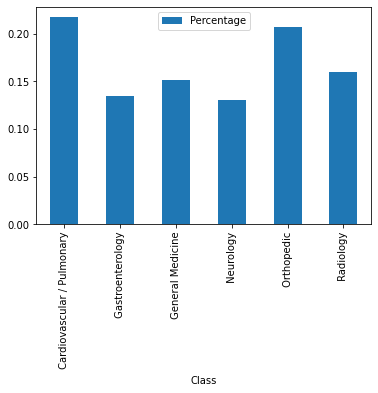

In [7]:
data_dist.plot.bar('Class', 'Percentage')

In [8]:
# Distribution of number of words per example
def count_words(txt):
    return len(txt.split())
med_txt['num_words'] = med_txt['description'].apply(count_words)
med_txt

,description,medical_specialty,num_words
0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,3
1,2-D Echocardiogram,Cardiovascular / Pulmonary,2
2,2-D Echocardiogram,Cardiovascular / Pulmonary,2
3,Echocardiogram and Doppler,Cardiovascular / Pulmonary,3
4,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,18
...,...,...,...
1707,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary,22
1708,Patient presents with a chief complaint of ch...,Cardiovascular / Pulmonary,20
1709,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,20
1710,Patient had a markedly abnormal stress test w...,Cardiovascular / Pulmonary,32


In [9]:
med_txt.describe()

,num_words
count,1712.000000
mean,18.278621
std,12.240291
min,0.000000
25%,9.000000
50%,15.000000
75%,26.000000
max,76.000000


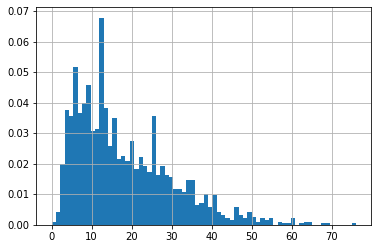

In [10]:
med_txt['num_words'].hist(bins=70, density=True)

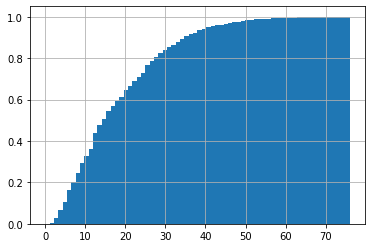

In [11]:
med_txt['num_words'].hist(bins=70, density=True, cumulative=True)

In [12]:
med_txt.num_words.sum()

31293

In [13]:
med_txt = med_txt[(med_txt.num_words >= 5) & (med_txt.num_words <= 50)]
med_txt

,description,medical_specialty,num_words
4,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,18
5,Cerebral Angiogram - moyamoya disease.,Neurology,5
6,Neck exploration; tracheostomy; urgent flexib...,Cardiovascular / Pulmonary,28
7,"The patient is a 17-year-old female, who pres...",General Medicine,30
8,Ultrasound examination of the scrotum due to ...,Radiology,28
...,...,...,...
1707,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary,22
1708,Patient presents with a chief complaint of ch...,Cardiovascular / Pulmonary,20
1709,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,20
1710,Patient had a markedly abnormal stress test w...,Cardiovascular / Pulmonary,32


## Preprocessing

In [14]:
import string
stop_words = "i me my myself we our ours ourselves you your yours yourself yourselves he him his himself r she her hers herself it its itself they them their theirs themselves what which who whom this that these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t d m can will just don should now'"
stop_words = stop_words.split()
def preprocess_txt(txt):
    # all lower case 
    txt = txt.lower()
    #remove punctuation
    txt = txt.translate({ord(a) : ord(' ') for a in string.punctuation})
    #remove numbers 
    txt = " ".join([a for a in txt.split() if not a.isdigit()])
    # Remove stop_words 
    txt = " ".join([a for a in txt.split() if a not in stop_words])
    return txt

In [15]:
med_txt['description_processed'] = med_txt['description'].apply(lambda x: preprocess_txt(x))
med_txt

/home/eslam/anaconda3/envs/ekyc/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,description,medical_specialty,num_words,description_processed
4,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,18,normal left ventricle moderate biatrial enlarg...
5,Cerebral Angiogram - moyamoya disease.,Neurology,5,cerebral angiogram moyamoya disease
6,Neck exploration; tracheostomy; urgent flexib...,Cardiovascular / Pulmonary,28,neck exploration tracheostomy urgent flexible ...
7,"The patient is a 17-year-old female, who pres...",General Medicine,30,patient year old female presents emergency roo...
8,Ultrasound examination of the scrotum due to ...,Radiology,28,ultrasound examination scrotum due scrotal pai...
...,...,...,...,...
1707,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary,22,adenosine nuclear scan patient unable walk tre...
1708,Patient presents with a chief complaint of ch...,Cardiovascular / Pulmonary,20,patient presents chief complaint chest pain ad...
1709,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,20,patient recurrent left arm pain stent three da...
1710,Patient had a markedly abnormal stress test w...,Cardiovascular / Pulmonary,32,patient markedly abnormal stress test severe c...


In [16]:
from collections import Counter
word_counter = Counter(" ".join(med_txt['description_processed'].to_list()).split())
word_counter.most_common()

[('left', 486),
 ('right', 440),
 ('patient', 377),
 ('pain', 272),
 ('history', 179),
 ('old', 165),
 ('ct', 162),
 ('year', 147),
 ('chest', 123),
 ('disease', 112),
 ('mri', 112),
 ('contrast', 112),
 ('coronary', 98),
 ('female', 95),
 ('without', 93),
 ('artery', 92),
 ('cervical', 92),
 ('anterior', 91),
 ('spine', 89),
 ('normal', 78),
 ('knee', 78),
 ('bilateral', 76),
 ('post', 74),
 ('back', 74),
 ('heart', 70),
 ('brain', 69),
 ('status', 67),
 ('upper', 67),
 ('syndrome', 65),
 ('chronic', 60),
 ('lower', 59),
 ('shoulder', 57),
 ('internal', 56),
 ('abdominal', 55),
 ('hypertension', 54),
 ('acute', 54),
 ('fracture', 53),
 ('male', 53),
 ('posterior', 52),
 ('foot', 52),
 ('abdomen', 51),
 ('placement', 50),
 ('scan', 50),
 ('stress', 50),
 ('lumbar', 50),
 ('stenosis', 49),
 ('evaluation', 49),
 ('low', 46),
 ('lobe', 46),
 ('pulmonary', 46),
 ('atrial', 45),
 ('fixation', 44),
 ('open', 44),
 ('well', 43),
 ('evaluate', 43),
 ('pelvis', 43),
 ('severe', 43),
 ('c5', 43)

In [17]:
len(word_counter)

3748

### Train Test split

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [19]:
import numpy as np 
X = np.array(med_txt['description_processed'])
Y = np.array(med_txt['medical_specialty'])

for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    

In [20]:
train = pd.DataFrame({"description_processed":X_train, "medical_specialty":Y_train})
train

,description_processed,medical_specialty
0,evaluation airway possible bacterial infection...,Cardiovascular / Pulmonary
1,shoulder pain right shoulder diffusely rotator...,Orthopedic
2,left cardiac catheterization selective right l...,Cardiovascular / Pulmonary
3,sample pulmonary function test,Cardiovascular / Pulmonary
4,preoperative cardiac evaluation patient chest ...,Cardiovascular / Pulmonary
...,...,...
1244,echocardiographic examination report angina co...,Radiology
1245,barium enema history encopresis constipation,Gastroenterology
1246,ct brain subacute sdh,Radiology
1247,patient chest pains cad cardiomyopathy,Radiology


In [21]:
test = pd.DataFrame({"description_processed":X_test, "medical_specialty":Y_test})
test

,description_processed,medical_specialty
0,mri brain mri c spine multiple hemangioblastom...,Orthopedic
1,year old male q fever endocarditis,Cardiovascular / Pulmonary
2,followup diabetes mellitus type,General Medicine
3,diagnostic cerebral angiogram transcatheter in...,Radiology
4,implantation dual chamber pacemaker fluoroscop...,Cardiovascular / Pulmonary
...,...,...
308,ct report soft tissue neck,Orthopedic
309,open reduction internal fixation orif right sc...,Orthopedic
310,atypical pneumonia hypoxia rheumatoid arthriti...,General Medicine
311,shortness breath two weeks history pneumonia c...,Radiology


## Feature Extraction

Simple word count feature 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
vectorizer = CountVectorizer()
vectorizer.fit(med_txt.description_processed)
x_train_count = vectorizer.transform(train.description_processed)

In [23]:
x_train_count.shape

(1249, 3735)

## Classification

In [24]:
from sklearn.naive_bayes import MultinomialNB
y_train = train['medical_specialty']
txt_classifer = MultinomialNB()
txt_classifer.fit(x_train_count,y_train)

MultinomialNB()

## Evaluation

In [25]:
x_test_count = vectorizer.transform(test.description_processed)

In [26]:
predicted_probs = txt_classifer.predict_proba(x_test_count)
predicted_probs.shape

(313, 6)

In [27]:
from sklearn.metrics import top_k_accuracy_score
y_test_true = test['medical_specialty'].apply(lambda x: list(txt_classifer.classes_).index(x)).to_list()

In [28]:
top_k_accuracy_score(y_score=predicted_probs, y_true=y_test_true)

0.8977635782747604

In [29]:
predicted = txt_classifer.predict(x_test_count)

In [30]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

M = confusion_matrix(predicted, test['medical_specialty'], normalize = 'all')

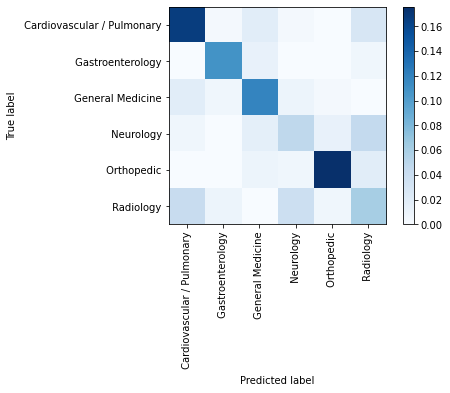

In [31]:
plot_confusion_matrix(txt_classifer, x_test_count, test['medical_specialty'], normalize = 'all', xticks_rotation='vertical', include_values= False, cmap='Blues') 

## Try it

In [32]:
def predict_txt(txt):
    txt = preprocess_txt(txt)
    wc = vectorizer.transform([txt])
    return txt_classifer.predict(wc)[0]

In [33]:
predict_txt("I have to do a CT scan")

' Radiology'